In [23]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [166]:
"""
All the functions in this cell:
"""


def initialize_points(n):
    # Generates n random points on a 2D space:
    return np.random.random(size=(n, 2))


def cost(route, points):
    # Calculates the total cost of a route.
    route_cost = 0
    for i in range(len(route) - 1):
        # Calculates the Euclidean distance between two consecutive points in the route
        # This is actually kind of a mathematical trick! Refer to https://stackoverflow.com/a/1401828 for details.
        route_cost += np.linalg.norm(points[route[i]] - points[route[i+1]])
    return route_cost


def mutate(route, mutation_probability=0.08):
    # Takes route (an array of length n) and swaps two random points in the route
    # (or equivalently two random elements in the array)
    new_route = route.copy()
    if np.random.random() < mutation_probability:
        # Choose two random indices to swap
        i, j = np.random.choice(len(route), size=2, replace=False)
        # Tuple swap:
        new_route[i], new_route[j] = new_route[j], new_route[i]
    return new_route


def rank_selection(population, points, sp=1.4):
    # Performs rank selection on a population of routes.
    # sp is the selection pressure parameter
    # Calculate the fitness (cost) of each route in the population:
    fitness = np.zeros(len(population))
    for i in range(len(population)):
        fitness[i] = cost(population[i], points)
    # Sort the population and fitness values:
    sorted_indices = np.argsort(fitness)
    population = np.array([population[i] for i in sorted_indices])
    fitness = fitness[sorted_indices]
    # Calculate the selection probability for each route based on their rank and fitness:
    n = len(population) - 2
    P_Ri = np.array([1/n * (sp - 2 * (sp-1) * ((i-1) / (n-1))) for i in range(1, n+1)])
    # Choose a random route based on its probability of selection (or equivalently, fitness):
    selected_index = np.random.choice(np.arange(2, n+2), p=P_Ri)
    # The top two are always selected as a form of Elitist Selection:
    return population[[0, 1, selected_index]]


def genetic_algorithm(n=15, population_size=100, mutation_probability=0.08, sp=1.4, generations=100):
    """
    Performs genetic algorithm for the Traveling Salesman Problem

    n: number of cities (points on the grid)

    population_size: number of arrays to be kept in each generation

    sp: selection pressure

    generations: number of generations (number of iterations of the genetic algorithm)

    Returns the best route, its cost and the cost of the best route at each iteration.
    """


    # Initialize random points in 2D:
    points = initialize_points(n)
    # Initialize the first population of random routes:
    population = [np.random.permutation(n) for _ in range(population_size)]
    # This array will contain the minimum cost of each iteration:
    costs = np.zeros(generations)
    # Iterate for "generations" number of times:
    for i in range(generations):
        # Calculate the cost of best route in the population:
        costs[i] = np.min([cost(route, points) for route in population])
        # Perform rank selection on the population:
        selected = [rank_selection(population, points, sp)[2] for _ in range(population_size-2)]
        selected.insert(0, rank_selection(population, points, sp)[1])
        selected.insert(0, rank_selection(population, points, sp)[0])
        # Perform mutation on the selected routes:
        mutated = [mutate(route, mutation_probability) for route in selected]
        # Update the population with the mutated routes:
        population = mutated
        # Find the best route and its cost in the final population:
        best_route = min(population, key=lambda route: cost(route, points))
        best_cost = cost(best_route, points)

    return best_route, best_cost, costs

In [226]:
# Takes 50 seconds to execute. Each iteration takes 0.5 seconds.
n = 15  # Number of points
population_size = 100  # The number of routes (arrays) that are kept in each generation
mutation_probability = 0.08  # Mutation probability
sp = 1.4  # Selection pressure parameter
iterations = 100  # Number of iterations
points = initialize_points(n=n)
# Run the genetic algorithm and get the results:
best_route, best_cost, costs = genetic_algorithm(n, population_size, mutation_probability, sp, iterations)

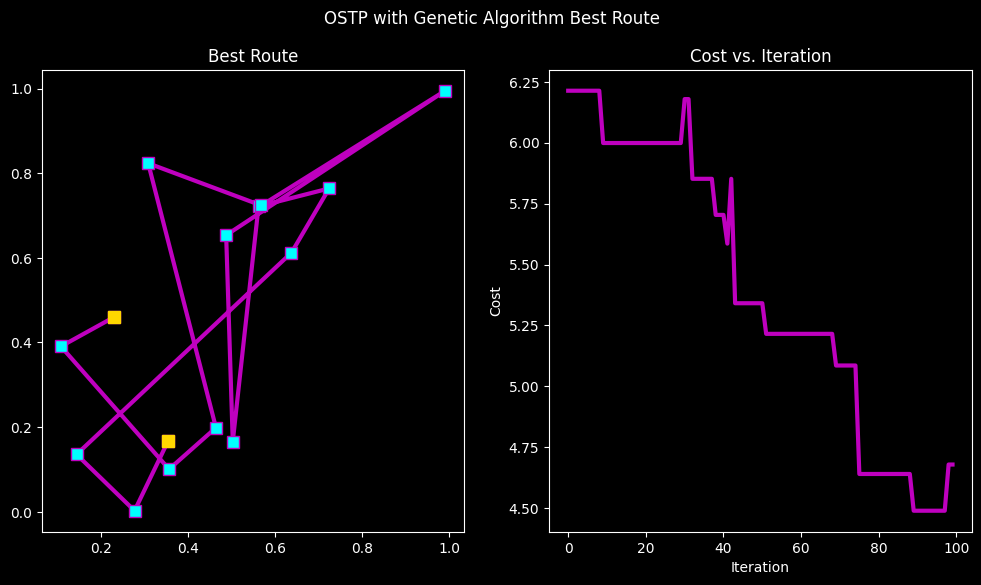

In [227]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
fig.suptitle("OSTP with Genetic Algorithm Best Route")

# Plot the points and the best route:
ax[0].scatter(points[:, 0], points[:, 1])
ax[0].plot(points[best_route, 0], points[best_route, 1], color="m", ms=8, marker="s", markerfacecolor="aqua", lw=3)
ax[0].plot(points[best_route, 0][0], points[best_route, 1][0], marker="s", ms=8, color="gold")
ax[0].plot(points[best_route, 0][-1], points[best_route, 1][-1], marker="s", ms=8, color="gold")
ax[0].set_title("Best Route")

# Plot the cost vs iteration curve 
ax[1].plot(range(iterations), costs, color="m", lw=3)
ax[1].set_title("Cost vs. Iteration")
ax[1].set_xlabel("Iteration")
ax[1].set_ylabel("Cost");

In [228]:
# fig.savefig("BestRoute.jpg")

In [244]:
# Takes 17 minutes.
different_ns = np.arange(6, 16)
population_size = 100  # The number of routes (arrays) that are kept in each generation
mutation_probability = 0.08  # Mutation probability
sp = 1.4  # Selection pressure parameter
ensemble_size = 10
timer = np.zeros((ensemble_size, len(different_ns)))
for i in range(len(different_ns)):
    for j in range(ensemble_size):
        n = different_ns[i]
        points = initialize_points(n=n)
        best_route, best_cost, costs = genetic_algorithm(n, population_size, mutation_probability, sp, 5)
        # If the last 8 elements are the same, it is safe to say we have reached a rather stable solution.
        while np.std(costs) != 0:
            best_route, best_cost, costs = genetic_algorithm(n, population_size, mutation_probability, sp, 5)
            timer[j, i] += 1

6 <<<<
7 <<<<
8 <<<<
9 <<<<
10 <<<<
11 <<<<
12 <<<<
13 <<<<
14 <<<<
15 <<<<


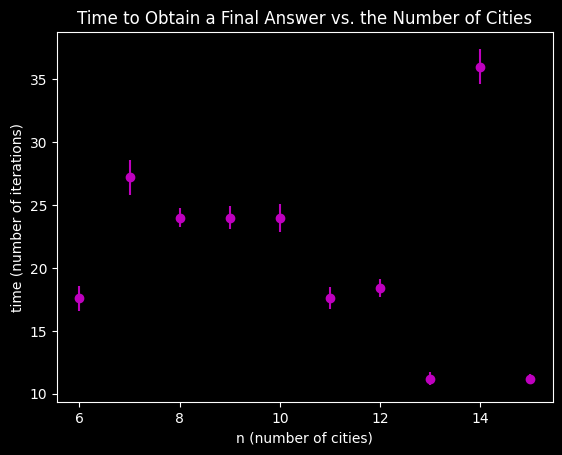

In [247]:
fig, ax = plt.subplots()

xs = different_ns
ys = np.mean(timer*5, axis=0)

ax.errorbar(xs, ys,
            yerr=np.std(timer, axis=0) / np.sqrt(ensemble_size-1),
            fmt="o",
            color="m");
ax.set_title("Time to Obtain a Final Answer vs. the Number of Cities")
ax.set_xlabel("n (number of cities)")
ax.set_ylabel("time (number of iterations)");

In [248]:
# fig.savefig("FinalAnswer.jpg")